In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("Crime_data.csv")

In [3]:
# pd.set_option('max_rows', None)

In [4]:
df

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District
0,"6/11/2023, 3:45 AM",7C,1500 CLIFTON AVE,AUTO THEFT,NaN,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST
1,"6/10/2023, 7:00 PM",5F,NaN,BURGLARY,NaN,NaN,NaN,NaN,SOUTHERN
2,"6/11/2023, 2:00 AM",7C,700 E 25TH ST,AUTO THEFT,NaN,NaN,NaN,NaN,NORTHEAST
3,"6/10/2023, 8:16 PM",4E,4200 PIMLICO RD,COMMON ASSAULT,PERSONAL_WEAPONS,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST
4,"6/11/2023, 5:00 AM",4B,2900 CHERRYLAND RD,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,F,39.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN
...,...,...,...,...,...,...,...,...,...
995,"5/30/2023, 6:00 AM",5F,3000 PULASKI HWY,BURGLARY,NaN,M,44.0,NaN,SOUTHEAST
996,"5/30/2023, 2:00 PM",6J,6200 OLD HARFORD RD,LARCENY,NaN,M,41.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST
997,"5/30/2023, 11:00 PM",6D,100 E Mt Royal Avenue,LARCENY FROM AUTO,NaN,F,33.0,WHITE,CENTRAL
998,"5/30/2023, 10:00 PM",7C,4700 POST RD,AUTO THEFT,NaN,M,56.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST


In [5]:
df.shape

(1000, 9)

# Null Value Handling

In [6]:
df.isna().sum()

CrimeDateTime      0
CrimeCode          0
Location          15
Description        0
Weapon           577
Victim_Gender    119
Victim_Age       139
Victim_Race      213
District           1
dtype: int64

In [7]:
df['Location'].fillna('Unknown', inplace=True)

In [8]:
df.Location.value_counts()

Unknown                    15
600 E 33RD ST               7
3500 BEECH AVE              5
4500 ERDMAN AVE             5
0 E FAYETTE ST              4
                           ..
1300 CHURCH ST              1
5400 SINCLAIR GREENS DR     1
1400 MEDFIELD AVE           1
3800 RIDGECROFT RD          1
700 MELVILLE AVE            1
Name: Location, Length: 806, dtype: int64

In [9]:
df['Weapon'].fillna("Other",inplace=True)

In [10]:
df.Weapon.isna().sum()

0

In [11]:
df.Weapon.value_counts()

Other                       577
PERSONAL_WEAPONS            260
FIREARM                      41
HANDGUN                      37
KNIFE_CUTTING_INSTRUMENT     33
BLUNT_OBJECT                 29
OTHER                        12
UNKNOWN                       5
SHOTGUN                       2
MOTOR_VEHICLE_VESSEL          2
KNIFE                         1
AUTOMATIC_HANDGUN             1
Name: Weapon, dtype: int64

In [12]:
df.Victim_Gender.value_counts()

F         439
M         419
Male       15
U           6
Female      2
Name: Victim_Gender, dtype: int64

In [13]:
df['Victim_Gender'] = df['Victim_Gender'].replace({'Female': 'F', 'Male': 'M'})


In [14]:
df['Victim_Gender'].value_counts()

F    441
M    434
U      6
Name: Victim_Gender, dtype: int64

In [15]:
df['Victim_Gender'].fillna("U",inplace=True)

In [16]:
df['Victim_Gender'].value_counts()

F    441
M    434
U    125
Name: Victim_Gender, dtype: int64

In [17]:
df['Victim_Gender'].isna().sum()

0

In [18]:
df['Victim_Age'].max()

93.0

In [19]:
df['Victim_Age'].min()     

0.0

In [20]:
df['Victim_Age'].unique() 

array([27., nan, 23., 39., 14., 37., 84., 32., 44., 53., 60., 41., 64.,
       35., 10., 15., 20., 48., 81., 31., 28., 25., 33., 38., 56., 58.,
       63., 36., 66., 19., 62., 24.,  1.,  3., 51., 42., 47., 30., 29.,
       40., 65., 49., 50., 57., 21., 59., 72., 34., 46., 22., 61., 12.,
       26., 43., 82., 52., 45., 13., 69., 55., 18., 71., 93.,  9.,  2.,
       76., 73., 74., 70., 16., 85., 17., 67., 54., 68.,  7.,  8.,  0.,
       78., 83.])

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

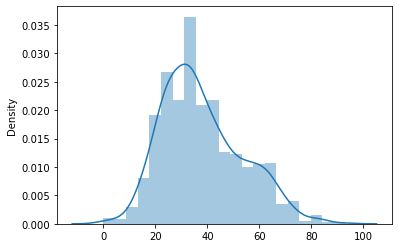

In [21]:
sns.distplot(x=df['Victim_Age'])

In [22]:
round(df.Victim_Age.mean())

38

In [23]:
df.Victim_Age.fillna(round(df.Victim_Age.mean()),inplace=True)

In [24]:
df.Victim_Age.isna().sum()

0

In [25]:
df.Victim_Race.value_counts()

BLACK_OR_AFRICAN_AMERICAN           589
WHITE                               172
ASIAN                                13
UNKNOWN                               9
AMERICAN_INDIAN_OR_ALASKA_NATIVE      4
Name: Victim_Race, dtype: int64

In [26]:
df["Victim_Race"].fillna("OTHER",inplace=True)

In [27]:
df["Victim_Race"].replace("UNKNOWN","OTHER",inplace=True)

In [28]:
df.Victim_Race.value_counts()

BLACK_OR_AFRICAN_AMERICAN           589
OTHER                               222
WHITE                               172
ASIAN                                13
AMERICAN_INDIAN_OR_ALASKA_NATIVE      4
Name: Victim_Race, dtype: int64

In [29]:
df.District.value_counts()

NORTHEAST    184
SOUTHEAST    127
NORTHERN     114
CENTRAL      110
NORTHWEST    106
SOUTHWEST    104
SOUTHERN      91
EASTERN       87
WESTERN       76
Name: District, dtype: int64

In [30]:
df["District"].fillna(df["District"].mode()[0],inplace=True)

In [31]:
df.isna().sum()

CrimeDateTime    0
CrimeCode        0
Location         0
Description      0
Weapon           0
Victim_Gender    0
Victim_Age       0
Victim_Race      0
District         0
dtype: int64

In [32]:
df

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District
0,"6/11/2023, 3:45 AM",7C,1500 CLIFTON AVE,AUTO THEFT,Other,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST
1,"6/10/2023, 7:00 PM",5F,Unknown,BURGLARY,Other,U,38.0,OTHER,SOUTHERN
2,"6/11/2023, 2:00 AM",7C,700 E 25TH ST,AUTO THEFT,Other,U,38.0,OTHER,NORTHEAST
3,"6/10/2023, 8:16 PM",4E,4200 PIMLICO RD,COMMON ASSAULT,PERSONAL_WEAPONS,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST
4,"6/11/2023, 5:00 AM",4B,2900 CHERRYLAND RD,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,F,39.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN
...,...,...,...,...,...,...,...,...,...
995,"5/30/2023, 6:00 AM",5F,3000 PULASKI HWY,BURGLARY,Other,M,44.0,OTHER,SOUTHEAST
996,"5/30/2023, 2:00 PM",6J,6200 OLD HARFORD RD,LARCENY,Other,M,41.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST
997,"5/30/2023, 11:00 PM",6D,100 E Mt Royal Avenue,LARCENY FROM AUTO,Other,F,33.0,WHITE,CENTRAL
998,"5/30/2023, 10:00 PM",7C,4700 POST RD,AUTO THEFT,Other,M,56.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST


In [33]:
df.CrimeDateTime.str.split(", ")[0][1]

'3:45 AM'

In [34]:
df['Date'] = df.CrimeDateTime.apply(lambda x:x.split(", ")[0])

In [35]:
df['Time'] = df.CrimeDateTime.apply(lambda x:x.split(", ")[1])

In [36]:
df['Date']=pd.to_datetime(df['Date'])

In [37]:
df.head()

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
0,"6/11/2023, 3:45 AM",7C,1500 CLIFTON AVE,AUTO THEFT,Other,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,2023-06-11,3:45 AM
1,"6/10/2023, 7:00 PM",5F,Unknown,BURGLARY,Other,U,38.0,OTHER,SOUTHERN,2023-06-10,7:00 PM
2,"6/11/2023, 2:00 AM",7C,700 E 25TH ST,AUTO THEFT,Other,U,38.0,OTHER,NORTHEAST,2023-06-11,2:00 AM
3,"6/10/2023, 8:16 PM",4E,4200 PIMLICO RD,COMMON ASSAULT,PERSONAL_WEAPONS,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-10,8:16 PM
4,"6/11/2023, 5:00 AM",4B,2900 CHERRYLAND RD,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,F,39.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN,2023-06-11,5:00 AM


In [38]:
df.Time.value_counts()

11:00 PM    29
2:00 AM     28
3:00 AM     25
12:00 AM    24
6:00 PM     23
            ..
6:10 AM      1
2:53 AM      1
4:56 AM      1
5:23 AM      1
11:58 AM     1
Name: Time, Length: 354, dtype: int64

In [39]:
df.Date.value_counts()

2023-06-10    105
2023-05-31     95
2023-05-13     92
2023-05-03     81
2023-04-22     77
2023-05-12     76
2023-05-30     73
2023-04-23     66
2023-05-02     51
2023-06-11     46
2023-06-09     40
2023-05-22     39
2023-04-12     31
2023-05-04     26
2023-06-01     22
2023-05-23     19
2023-04-13     19
2023-05-21     10
2023-04-01      9
2023-03-31      8
2023-04-21      6
2023-05-14      5
2023-04-24      4
Name: Date, dtype: int64

In [40]:
df.head()

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
0,"6/11/2023, 3:45 AM",7C,1500 CLIFTON AVE,AUTO THEFT,Other,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,2023-06-11,3:45 AM
1,"6/10/2023, 7:00 PM",5F,Unknown,BURGLARY,Other,U,38.0,OTHER,SOUTHERN,2023-06-10,7:00 PM
2,"6/11/2023, 2:00 AM",7C,700 E 25TH ST,AUTO THEFT,Other,U,38.0,OTHER,NORTHEAST,2023-06-11,2:00 AM
3,"6/10/2023, 8:16 PM",4E,4200 PIMLICO RD,COMMON ASSAULT,PERSONAL_WEAPONS,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-10,8:16 PM
4,"6/11/2023, 5:00 AM",4B,2900 CHERRYLAND RD,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,F,39.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN,2023-06-11,5:00 AM


In [41]:
df=df.drop("CrimeDateTime",axis=1)

In [42]:
df

,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
0,7C,1500 CLIFTON AVE,AUTO THEFT,Other,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,2023-06-11,3:45 AM
1,5F,Unknown,BURGLARY,Other,U,38.0,OTHER,SOUTHERN,2023-06-10,7:00 PM
2,7C,700 E 25TH ST,AUTO THEFT,Other,U,38.0,OTHER,NORTHEAST,2023-06-11,2:00 AM
3,4E,4200 PIMLICO RD,COMMON ASSAULT,PERSONAL_WEAPONS,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-10,8:16 PM
4,4B,2900 CHERRYLAND RD,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,F,39.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN,2023-06-11,5:00 AM
...,...,...,...,...,...,...,...,...,...,...
995,5F,3000 PULASKI HWY,BURGLARY,Other,M,44.0,OTHER,SOUTHEAST,2023-05-30,6:00 AM
996,6J,6200 OLD HARFORD RD,LARCENY,Other,M,41.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,2023-05-30,2:00 PM
997,6D,100 E Mt Royal Avenue,LARCENY FROM AUTO,Other,F,33.0,WHITE,CENTRAL,2023-05-30,11:00 PM
998,7C,4700 POST RD,AUTO THEFT,Other,M,56.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-05-30,10:00 PM


In [43]:
df[df["Victim_Age"]<=10]

,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
26,4E,5200 ROLAND AVE,COMMON ASSAULT,PERSONAL_WEAPONS,M,10.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,2023-05-31,8:40 PM
51,4A,Unknown,AGG. ASSAULT,FIREARM,F,1.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-05-22,8:17 PM
52,4A,Unknown,AGG. ASSAULT,FIREARM,F,3.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-05-22,8:17 PM
202,4A,4100 EIERMAN AVE,AGG. ASSAULT,HANDGUN,M,9.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,2023-05-31,7:30 PM
204,4A,4100 EIERMAN AVE,AGG. ASSAULT,HANDGUN,F,2.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,2023-05-31,7:30 PM
550,4E,2200 W LEXINGTON ST,COMMON ASSAULT,Other,M,7.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,2023-05-30,11:00 PM
562,4E,2500 ALLENDALE RD,COMMON ASSAULT,PERSONAL_WEAPONS,M,8.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-05-02,5:00 PM
698,3AO,600 LIGHT ST,ROBBERY,Other,F,0.0,BLACK_OR_AFRICAN_AMERICAN,CENTRAL,2023-06-10,8:11 PM
941,4B,2200 W FAYETTE ST,AGG. ASSAULT,PERSONAL_WEAPONS,F,10.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,2023-04-23,5:00 AM
961,4E,900 FLEET ST,COMMON ASSAULT,PERSONAL_WEAPONS,F,7.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,2023-05-13,1:15 AM


In [44]:
df['District'].value_counts()

NORTHEAST    185
SOUTHEAST    127
NORTHERN     114
CENTRAL      110
NORTHWEST    106
SOUTHWEST    104
SOUTHERN      91
EASTERN       87
WESTERN       76
Name: District, dtype: int64

In [45]:
df['Year']=df['Date'].dt.year

In [46]:
df['Day']=df['Date'].dt.day

In [47]:
df['Month']=df['Date'].dt.month_name()

In [48]:
df.head()

,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time,Year,Day,Month
0,7C,1500 CLIFTON AVE,AUTO THEFT,Other,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,2023-06-11,3:45 AM,2023,11,June
1,5F,Unknown,BURGLARY,Other,U,38.0,OTHER,SOUTHERN,2023-06-10,7:00 PM,2023,10,June
2,7C,700 E 25TH ST,AUTO THEFT,Other,U,38.0,OTHER,NORTHEAST,2023-06-11,2:00 AM,2023,11,June
3,4E,4200 PIMLICO RD,COMMON ASSAULT,PERSONAL_WEAPONS,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-10,8:16 PM,2023,10,June
4,4B,2900 CHERRYLAND RD,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,F,39.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN,2023-06-11,5:00 AM,2023,11,June


In [49]:
df.Month.value_counts()

May      567
June     213
April    212
March      8
Name: Month, dtype: int64

In [50]:
print(df[['Month','Day']].value_counts())

Month  Day
June   10     105
May    31      95
       13      92
       3       81
April  22      77
May    12      76
       30      73
April  23      66
May    2       51
June   11      46
       9       40
May    22      39
April  12      31
May    4       26
June   1       22
April  13      19
May    23      19
       21      10
April  1        9
March  31       8
April  21       6
May    14       5
April  24       4
dtype: int64


In [51]:
df.groupby(['Month','Victim_Race']).size().reset_index(name='Count')

,Month,Victim_Race,Count
0,April,AMERICAN_INDIAN_OR_ALASKA_NATIVE,1
1,April,ASIAN,1
2,April,BLACK_OR_AFRICAN_AMERICAN,136
3,April,OTHER,31
4,April,WHITE,43
5,June,AMERICAN_INDIAN_OR_ALASKA_NATIVE,1
6,June,ASIAN,3
7,June,BLACK_OR_AFRICAN_AMERICAN,120
8,June,OTHER,53
9,June,WHITE,36


In [52]:
df.Victim_Age.dtype

dtype('float64')

In [53]:
df.Description.value_counts()

COMMON ASSAULT          232
AUTO THEFT              198
LARCENY                 174
AGG. ASSAULT            119
LARCENY FROM AUTO        90
ROBBERY                  71
BURGLARY                 63
SHOOTING                 14
ROBBERY - CARJACKING     12
ROBBERY - COMMERCIAL     11
RAPE                      8
ARSON                     5
HOMICIDE                  3
Name: Description, dtype: int64

In [54]:
df.to_csv("Crime_clean_data.csv",index=False)